## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = 'https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv'
charity_data_df = pd.read_csv(url)
charity_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
charity_data_df.drop(columns = ['EIN'], inplace=True)
charity_data_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
for i in charity_data_df.columns:
    print(i, len(charity_data_df[i].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = charity_data_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts<500].index)

# Replace in dataframe
for j in application_types_to_replace:
    charity_data_df['APPLICATION_TYPE'] = charity_data_df['APPLICATION_TYPE'].replace(j, "Other_application_type")
    
# Check to make sure binning was successful
charity_data_df['APPLICATION_TYPE'].value_counts()

T3                        27037
T4                         1542
T6                         1216
T5                         1173
T19                        1065
T8                          737
T7                          725
T10                         528
Other_application_type      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_types = charity_data_df['CLASSIFICATION'].value_counts()
class_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
charity_data_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_to_replace = list(class_types[class_types<1000].index)

# Replace in dataframe
for i in class_to_replace:
    charity_data_df['CLASSIFICATION'] = charity_data_df['CLASSIFICATION'].replace(i,"Other")
    
# Check to make sure binning was successful
charity_data_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
charity_data_dummies = pd.get_dummies(charity_data_df)
charity_data_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = charity_data_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = charity_data_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# (FIRST ATTEMPT - ACCURACY 57%)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 4
number_of_neurons = tf.keras.models.Sequential()

# First hidden layer
number_of_neurons.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
number_of_neurons.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
number_of_neurons.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
number_of_neurons.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 137284    
                                                                 
 dense_1 (Dense)             (None, 4)                 32        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137321 (536.41 KB)
Trainable params: 137321 (536.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model(FIRST ATTEMPT)
number_of_neurons.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model(FIRST ATTEMPT)
fit_model = number_of_neurons.fit(X_train_scaled,y_train, epochs=100, validation_data=(X_test_scaled,y_test))

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.6145 - accuracy: 0.6973 - val_loss: 0.6437 - val_accuracy: 0.5720
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.2747 - accuracy: 0.9028 - val_loss: 0.6353 - val_accuracy: 0.5768
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.1742 - accuracy: 0.9389 - val_loss: 0.5898 - val_accuracy: 0.5894
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.1404 - accuracy: 0.9510 - val_loss: 0.5316 - val_accuracy: 0.6247
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.1264 - accuracy: 0.9537 - val_loss: 0.5396 - val_accuracy: 0.6239
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.1217 - accuracy: 0.9546 - val_loss: 0.5536 - val_accuracy: 0.6040
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.1196 - accuracy: 0.9541 - val_loss: 0.5693 - val_accuracy: 0.6003

Epoch 58/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0969 - accuracy: 0.9619 - val_loss: 0.6402 - val_accuracy: 0.5960
Epoch 59/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0966 - accuracy: 0.9615 - val_loss: 0.6143 - val_accuracy: 0.6162
Epoch 60/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0970 - accuracy: 0.9621 - val_loss: 0.6298 - val_accuracy: 0.6148
Epoch 61/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0963 - accuracy: 0.9624 - val_loss: 0.6525 - val_accuracy: 0.5952
Epoch 62/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0964 - accuracy: 0.9623 - val_loss: 0.6125 - val_accuracy: 0.6980
Epoch 63/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0960 - accuracy: 0.9624 - val_loss: 0.5864 - val_accuracy: 0.7017
Epoch 64/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0961 - accuracy: 0.9622 - val_loss: 0.5859 - val_accuracy:

In [15]:
# Evaluate the model using the test data(FIRST ATTEMPT)
model_loss, model_accuracy = number_of_neurons.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5589 - accuracy: 0.7527 - 306ms/epoch - 1ms/step
Loss: 0.5589169263839722, Accuracy: 0.7526530623435974


In [16]:
# list all data in history
print(fit_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


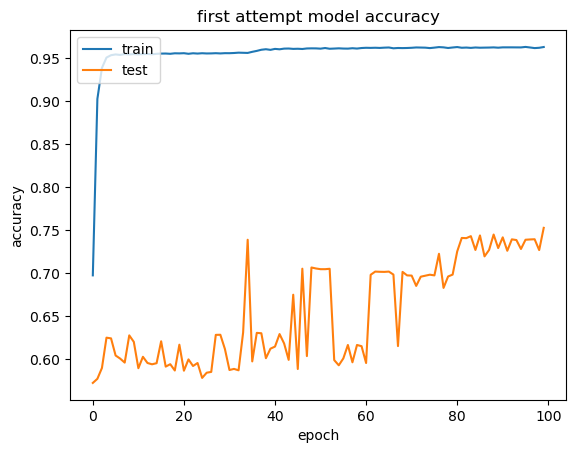

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('first attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_one_accuracy.png')
plt.show()

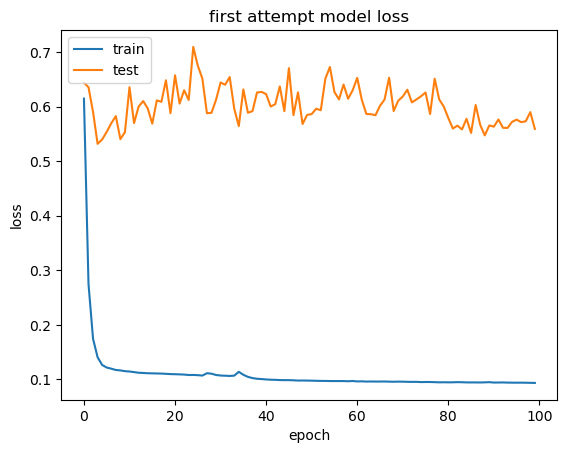

In [18]:
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('first attempt model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_one_loss.png')
plt.show()

In [19]:
# (SECOND ATTEMPT - ACCURACY 73%)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 =10
hidden_nodes_layer2 = 8
number_of_neurons = tf.keras.models.Sequential()

# First hidden layer
number_of_neurons.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
number_of_neurons.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
number_of_neurons.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
number_of_neurons.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                196120    
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 196217 (766.47 KB)
Trainable params: 196217 (766.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the model(SECOND ATTEMPT)
number_of_neurons.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model(SECOND ATTEMPT)
fit_model = number_of_neurons.fit(X_train_scaled,y_train,epochs=100, validation_data=(X_test_scaled,y_test))

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.6911 - val_accuracy: 0.5742
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.2747 - accuracy: 0.8816 - val_loss: 0.9260 - val_accuracy: 0.5672
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.1401 - accuracy: 0.9432 - val_loss: 0.6976 - val_accuracy: 0.5741
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.1075 - accuracy: 0.9575 - val_loss: 0.6620 - val_accuracy: 0.5773
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0984 - accuracy: 0.9600 - val_loss: 0.7544 - val_accuracy: 0.5734
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0953 - accuracy: 0.9609 - val_loss: 0.6457 - val_accuracy: 0.5822
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0933 - accuracy: 0.9614 - val_loss: 0.6687 - val_accuracy: 0.5728

Epoch 58/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0823 - accuracy: 0.9657 - val_loss: 0.6395 - val_accuracy: 0.5917
Epoch 59/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0820 - accuracy: 0.9655 - val_loss: 0.6255 - val_accuracy: 0.5985
Epoch 60/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0821 - accuracy: 0.9656 - val_loss: 0.6262 - val_accuracy: 0.6065
Epoch 61/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0818 - accuracy: 0.9659 - val_loss: 0.6211 - val_accuracy: 0.6133
Epoch 62/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0818 - accuracy: 0.9656 - val_loss: 0.6512 - val_accuracy: 0.5916
Epoch 63/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0820 - accuracy: 0.9654 - val_loss: 0.6312 - val_accuracy: 0.6141
Epoch 64/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0820 - accuracy: 0.9655 - val_loss: 0.6342 - val_accuracy:

In [22]:
# Evaluate the model using the test data(SECOND ATTEMPT)
model_loss, model_accuracy = number_of_neurons.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6118 - accuracy: 0.6205 - 358ms/epoch - 1ms/step
Loss: 0.6117748618125916, Accuracy: 0.6205247640609741


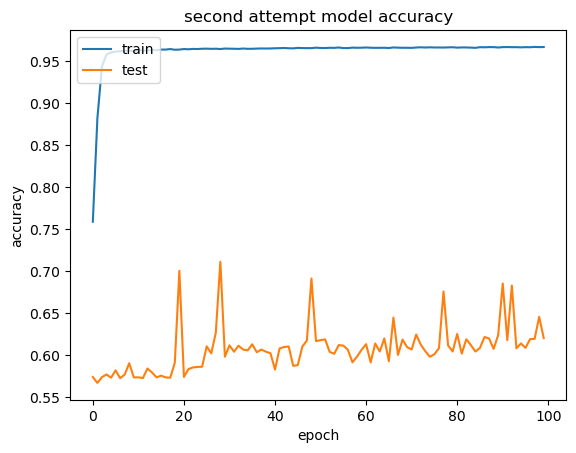

In [23]:
# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('second attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_two_accuracy.png')
plt.show()

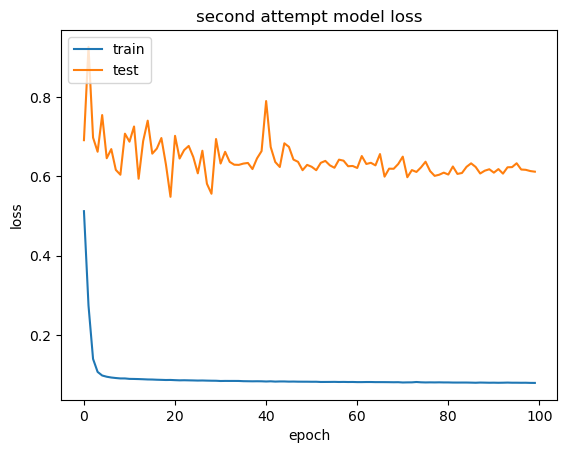

In [24]:
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('second attempt model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_two_loss.png')
plt.show()

In [25]:
# (THIRD ATTEMPT - ACCURACY 73%)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 10
number_of_neurons = tf.keras.models.Sequential()

# First hidden layer
number_of_neurons.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
number_of_neurons.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
number_of_neurons.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
number_of_neurons.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                235344    
                                                                 
 dense_7 (Dense)             (None, 10)                130       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 235485 (919.86 KB)
Trainable params: 235485 (919.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Compile the model(THIRD ATTEMPT)
number_of_neurons.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model(THIRD ATTEMPT ATTEMPT)
fit_model = number_of_neurons.fit(X_train_scaled,y_train,epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
804/804 [==============================] - 3s 4ms/step - loss: 0.6204 - accuracy: 0.7156 - val_loss: 0.6398 - val_accuracy: 0.5798
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.2917 - accuracy: 0.8873 - val_loss: 0.5000 - val_accuracy: 0.7268
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.1207 - accuracy: 0.9531 - val_loss: 0.5281 - val_accuracy: 0.7124
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.1008 - accuracy: 0.9581 - val_loss: 0.5306 - val_accuracy: 0.6947
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0949 - accuracy: 0.9602 - val_loss: 0.5510 - val_accuracy: 0.5992
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0933 - accuracy: 0.9613 - val_loss: 0.5689 - val_accuracy: 0.6020
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.9610 - val_loss: 0.5464 - val_accuracy: 0.6140

Epoch 58/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0809 - accuracy: 0.9664 - val_loss: 0.5707 - val_accuracy: 0.7458
Epoch 59/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0812 - accuracy: 0.9661 - val_loss: 0.5697 - val_accuracy: 0.7507
Epoch 60/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0808 - accuracy: 0.9658 - val_loss: 0.5779 - val_accuracy: 0.7185
Epoch 61/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0810 - accuracy: 0.9656 - val_loss: 0.5744 - val_accuracy: 0.7531
Epoch 62/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0806 - accuracy: 0.9666 - val_loss: 0.5685 - val_accuracy: 0.7454
Epoch 63/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0806 - accuracy: 0.9661 - val_loss: 0.5769 - val_accuracy: 0.7424
Epoch 64/100
804/804 [==============================] - 2s 3ms/step - loss: 0.0804 - accuracy: 0.9661 - val_loss: 0.5701 - val_accuracy:

In [28]:
# Evaluate the model using the test data(THIRD ATTEMPT)
model_loss, model_accuracy = number_of_neurons.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6028 - accuracy: 0.7631 - 371ms/epoch - 1ms/step
Loss: 0.6027984023094177, Accuracy: 0.7631486654281616


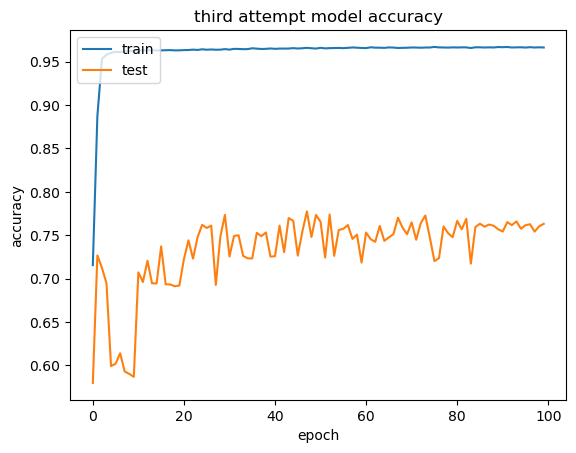

In [29]:
# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('third attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_three_accuracy.png')
plt.show()

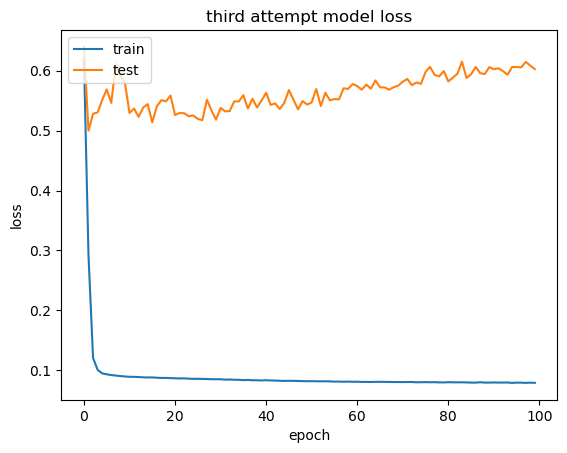

In [31]:
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('third attempt model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_three_loss.png')
plt.show()